<a href="https://colab.research.google.com/github/venzera/CTCFEvo/blob/main/ESMC_peptide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q esm

In [4]:
import pandas as pd
import numpy as np
import torch

df = pd.read_csv('peptide_binding_data.csv')
df

,name,sequence,kd_value,binding
0,PRR12,YAQEYEFEADEDKAD,2.6,1
1,IFFO1,QLREYDFEDDCDSL,3.2,1
2,BCOR,YSDVFEFEFSETPL,5.7,1
3,PAGR1,MPTEFDFDDEPVTP,6.5,1
4,TOP2B,PKYTFDFSEEEDDD,7.4,1
5,KMT2D,YDYQFDFEDDQHKI,12.4,1
6,KMT2C,YDYKFDFEDDQHKI,nb,0
7,ZNF33A_B,RDNHYEFSDCEKFL,21.7,1
8,NIPBL,LCRHFDFDLEDFKG,38.9,1
9,HOXA2,MNYEFEREIGFIN,nb,0


In [5]:
from esm.models.esmc import ESMC
from esm.sdk.api import ESMProtein, LogitsConfig
model = ESMC.from_pretrained("esmc_300m").to("cuda") # or "cpu"

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

data/weights/esmc_300m_2024_12_v0.pth:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [6]:
def get_protein_embedding(sequence: str) -> np.ndarray:
    protein = ESMProtein(sequence=sequence)
    protein_tensor = model.encode(protein)
    with torch.no_grad():
        output = model.logits(
            protein_tensor,
            LogitsConfig(sequence=True, return_embeddings=True)
        )

    # Mean pool over residues (skip BOS token at position 0)
    emb = output.embeddings[0, 1:len(sequence)+1, :].mean(dim=0)
    return emb.cpu().numpy()

In [7]:
df['emb'] = df['sequence'].apply(get_protein_embedding)
df


,name,sequence,kd_value,binding,emb
0,PRR12,YAQEYEFEADEDKAD,2.6,1,"[-0.003172511, -0.019873517, 0.021879477, 0.01..."
1,IFFO1,QLREYDFEDDCDSL,3.2,1,"[-0.012833366, -0.014776603, 0.01198695, 0.025..."
2,BCOR,YSDVFEFEFSETPL,5.7,1,"[-0.00853066, -0.025143627, 0.019345382, 0.022..."
3,PAGR1,MPTEFDFDDEPVTP,6.5,1,"[-0.013685506, -0.0062571485, 0.0061046826, 0...."
4,TOP2B,PKYTFDFSEEEDDD,7.4,1,"[-0.007718532, -0.0024884832, 0.009593116, 0.0..."
5,KMT2D,YDYQFDFEDDQHKI,12.4,1,"[-0.00862173, -0.0073394338, 0.017016403, 0.01..."
6,KMT2C,YDYKFDFEDDQHKI,nb,0,"[-0.009323817, -0.014567073, 0.017601196, 0.01..."
7,ZNF33A_B,RDNHYEFSDCEKFL,21.7,1,"[-0.012966174, -0.021204729, 0.024359178, 0.02..."
8,NIPBL,LCRHFDFDLEDFKG,38.9,1,"[-0.014433966, -0.01659641, 0.014360139, 0.025..."
9,HOXA2,MNYEFEREIGFIN,nb,0,"[-0.02087574, -0.027754609, 0.021584481, 0.029..."


In [8]:
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix


In [9]:
X = np.stack(df['emb'].to_list())

y = np.stack(df['binding'].to_list())

In [10]:
y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [11]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
# Removed deprecated 'use_label_encoder' parameter
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# LOO-CV: consistent with previous cell's evaluation strategy
loo = LeaveOneOut()
y_pred_xgb = cross_val_predict(xgb_model, X, y, cv=loo)
y_prob_xgb = cross_val_predict(xgb_model, X, y, cv=loo, method='predict_proba')[:, 1]

# Metrics
print(f"XGBoost Accuracy: {accuracy_score(y, y_pred_xgb):.3f}")
print(f"XGBoost AUC-ROC:  {roc_auc_score(y, y_prob_xgb):.3f}")
print(f"XGBoost MCC:      {matthews_corrcoef(y, y_pred_xgb):.3f}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y, y_pred_xgb)}")

# Train final model on ALL data
xgb_model.fit(X, y)

XGBoost Accuracy: 0.706
XGBoost AUC-ROC:  0.765
XGBoost MCC:      0.398

Confusion Matrix:
[[ 8  7]
 [ 3 16]]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# LOO-CV evaluation
y_pred_rf = cross_val_predict(rf_model, X, y, cv=loo)
y_prob_rf = cross_val_predict(rf_model, X, y, cv=loo, method='predict_proba')[:, 1]

# Metrics
print(f"Random Forest Accuracy: {accuracy_score(y, y_pred_rf):.3f}")
print(f"Random Forest AUC-ROC:  {roc_auc_score(y, y_prob_rf):.3f}")
print(f"Random Forest MCC:      {matthews_corrcoef(y, y_pred_rf):.3f}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y, y_pred_rf)}")

# Train final model on ALL data
rf_model.fit(X, y)

Random Forest Accuracy: 0.618
Random Forest AUC-ROC:  0.623
Random Forest MCC:      0.219

Confusion Matrix:
[[ 8  7]
 [ 6 13]]


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define base learners with more variety
estimators = [
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('svm', SVC(probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
]

# Initialize Stacking Classifier
# We use LOO for the internal cross-validation to be consistent with the small dataset strategy
super_learner = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=loo
)

# Evaluate with LOO-CV (Nested LOO: Outer for eval, Inner for stacking)
print("Training Expanded Super Learner (this will take longer due to more models)...")
y_pred_stack = cross_val_predict(super_learner, X, y, cv=loo)
y_prob_stack = cross_val_predict(super_learner, X, y, cv=loo, method='predict_proba')[:, 1]

# Metrics
print(f"Super Learner Accuracy: {accuracy_score(y, y_pred_stack):.3f}")
print(f"Super Learner AUC-ROC:  {roc_auc_score(y, y_prob_stack):.3f}")
print(f"Super Learner MCC:      {matthews_corrcoef(y, y_pred_stack):.3f}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y, y_pred_stack)}")

# Train final model on ALL data
super_learner.fit(X, y)

Training Expanded Super Learner (this will take longer due to more models)...
Super Learner Accuracy: 0.824
Super Learner AUC-ROC:  0.856
Super Learner MCC:      0.642

Confusion Matrix:
[[12  3]
 [ 3 16]]


StackingClassifier(cv=LeaveOneOut(),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('svm', SVC(probability=True, random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('ada', AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [74]:
import pandas as pd

data = {
    "id": [3,4,5,6,7,8,9, 10, 11, 12, 13, 14],
    "Name": ["CTCF_Chicken","CTCF_Lancelet","CTCF_Drosophila","CTCF_Lampley","CTCF_Skate","CTCF_SeaUrchin","CTCF_Styela", "SYCP3", "MCM3", "ANKRD11", "Y226A", "Y226C"],
    "Sequence": ["DVSVYDFEEEQQ","DISVYDFDELDK","EAEVYEFEDNAT","DISVYDFEEQEE","DLSVYDFEEEQQ","DPSVYDFYAGED","DDSVYEFQEPPT", "FTRAYDFETEDK", "SYDPYDFSDTEE", "VKDEYEFDEDDE", "DVSVADFEEEQQ", "DVSVCDFEEEQQ"],
    "Binding": [1,0,0,1,1,0,-1, 1, 1, 1, 0, 0]
}

pff = pd.DataFrame(data)
pff

,id,Name,Sequence,Binding
0,3,CTCF_Chicken,DVSVYDFEEEQQ,1
1,4,CTCF_Lancelet,DISVYDFDELDK,0
2,5,CTCF_Drosophila,EAEVYEFEDNAT,0
3,6,CTCF_Lampley,DISVYDFEEQEE,1
4,7,CTCF_Skate,DLSVYDFEEEQQ,1
5,8,CTCF_SeaUrchin,DPSVYDFYAGED,0
6,9,CTCF_Styela,DDSVYEFQEPPT,-1
7,10,SYCP3,FTRAYDFETEDK,1
8,11,MCM3,SYDPYDFSDTEE,1
9,12,ANKRD11,VKDEYEFDEDDE,1


In [75]:
pff['emb'] = pff['Sequence'].apply(get_protein_embedding)
pff


,id,Name,Sequence,Binding,emb
0,3,CTCF_Chicken,DVSVYDFEEEQQ,1,"[-0.00698412, -0.012618167, 0.013713561, 0.018..."
1,4,CTCF_Lancelet,DISVYDFDELDK,0,"[-0.011535138, -0.0017556953, 0.012119032, 0.0..."
2,5,CTCF_Drosophila,EAEVYEFEDNAT,0,"[-0.0018376075, -0.01134581, 0.023105359, 0.00..."
3,6,CTCF_Lampley,DISVYDFEEQEE,1,"[-0.009570675, -0.008074891, 0.018730436, 0.01..."
4,7,CTCF_Skate,DLSVYDFEEEQQ,1,"[-0.012388734, -0.013944506, 0.01804967, 0.021..."
5,8,CTCF_SeaUrchin,DPSVYDFYAGED,0,"[-0.015642654, 0.011900017, 0.016536415, 0.017..."
6,9,CTCF_Styela,DDSVYEFQEPPT,-1,"[-0.016630296, -0.007007103, 0.017863408, 0.01..."
7,10,SYCP3,FTRAYDFETEDK,1,"[-0.016109552, -0.004254988, 0.027034998, 0.01..."
8,11,MCM3,SYDPYDFSDTEE,1,"[-0.012820407, 0.009442881, 0.012837091, 0.022..."
9,12,ANKRD11,VKDEYEFDEDDE,1,"[0.007007013, -0.0084328465, 0.01530544, 0.018..."


In [76]:
logs = pff.index
c = 0
for i in pff['emb']:

  arr = np.array(i).reshape(1, -1)
  pred = xgb_model.predict(arr)
  # Fixed: changed .iloc(c) to .iloc[c]
  print(f"{pff['Name'].iloc[c]} binding is : {pred}")
  c += 1

CTCF_Chicken binding is : [0]
CTCF_Lancelet binding is : [1]
CTCF_Drosophila binding is : [1]
CTCF_Lampley binding is : [1]
CTCF_Skate binding is : [1]
CTCF_SeaUrchin binding is : [0]
CTCF_Styela binding is : [1]
SYCP3 binding is : [1]
MCM3 binding is : [1]
ANKRD11 binding is : [1]
Y226A binding is : [0]
Y226C binding is : [1]


In [77]:
logs = pff.index
c = 0
for i in pff['emb']:

  arr = np.array(i).reshape(1, -1)
  pred = rf_model.predict(arr)
  # Fixed: changed .iloc(c) to .iloc[c]
  print(f"{pff['Name'].iloc[c]} binding is : {pred}")
  c += 1

CTCF_Chicken binding is : [1]
CTCF_Lancelet binding is : [1]
CTCF_Drosophila binding is : [1]
CTCF_Lampley binding is : [1]
CTCF_Skate binding is : [1]
CTCF_SeaUrchin binding is : [1]
CTCF_Styela binding is : [1]
SYCP3 binding is : [0]
MCM3 binding is : [1]
ANKRD11 binding is : [1]
Y226A binding is : [0]
Y226C binding is : [1]


In [78]:
# =============================================================================
# Evaluate & Predict using existing df and trained super_learner
# =============================================================================

import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# Build feature matrix from embeddings column
X = np.vstack(pff['emb'].values)
y = pff['Binding'].values

# Split known vs unknown (Styela)
known_mask = pff['Binding'] != -1
unknown_mask = pff['Binding'] == -1

X_known = X[known_mask]
y_known = y[known_mask]
X_unknown = X[unknown_mask]

# -----------------------------------------------------------------------------
# Evaluate on known data
# -----------------------------------------------------------------------------
y_pred = super_learner.predict(X_known)
y_prob = super_learner.predict_proba(X_known)[:, 1]

print("="*60)
print("EVALUATION (excluding Styela)")
print("="*60)
print(f"Accuracy: {accuracy_score(y_known, y_pred):.3f}")
print(f"AUC-ROC:  {roc_auc_score(y_known, y_prob):.3f}")
print(f"MCC:      {matthews_corrcoef(y_known, y_pred):.3f}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_known, y_pred)}")

print("\nPer-sample:")
for i, (_, row) in enumerate(pff[known_mask].iterrows()):
    status = "✓" if y_pred[i] == y_known[i] else "✗"
    print(f"  {status} {row['Name']:18s} true={y_known[i]} pred={y_pred[i]} prob={y_prob[i]:.3f}")

# -----------------------------------------------------------------------------
# Predict Styela
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("PREDICTION: STYELA")
print("="*60)
pred = super_learner.predict(X_unknown)[0]
prob = super_learner.predict_proba(X_unknown)[0]

print(f"Sequence:   {pff[unknown_mask]['Sequence'].values[0]}")
print(f"Prediction: {'BINDER' if pred == 1 else 'NON-BINDER'}")
print(f"Confidence: P(binder)={prob[1]:.3f}")

EVALUATION (excluding Styela)
Accuracy: 0.636
AUC-ROC:  0.433
MCC:      0.261

Confusion Matrix:
[[2 3]
 [1 5]]

Per-sample:
  ✗ CTCF_Chicken       true=1 pred=0 prob=0.256
  ✗ CTCF_Lancelet      true=0 pred=1 prob=0.775
  ✗ CTCF_Drosophila    true=0 pred=1 prob=0.805
  ✓ CTCF_Lampley       true=1 pred=1 prob=0.776
  ✓ CTCF_Skate         true=1 pred=1 prob=0.776
  ✓ CTCF_SeaUrchin     true=0 pred=0 prob=0.285
  ✓ SYCP3              true=1 pred=1 prob=0.799
  ✓ MCM3               true=1 pred=1 prob=0.771
  ✓ ANKRD11            true=1 pred=1 prob=0.761
  ✓ Y226A              true=0 pred=0 prob=0.273
  ✗ Y226C              true=0 pred=1 prob=0.807

PREDICTION: STYELA
Sequence:   DDSVYEFQEPPT
Prediction: NON-BINDER
Confidence: P(binder)=0.338


In [79]:
pff

,id,Name,Sequence,Binding,emb
0,3,CTCF_Chicken,DVSVYDFEEEQQ,1,"[-0.00698412, -0.012618167, 0.013713561, 0.018..."
1,4,CTCF_Lancelet,DISVYDFDELDK,0,"[-0.011535138, -0.0017556953, 0.012119032, 0.0..."
2,5,CTCF_Drosophila,EAEVYEFEDNAT,0,"[-0.0018376075, -0.01134581, 0.023105359, 0.00..."
3,6,CTCF_Lampley,DISVYDFEEQEE,1,"[-0.009570675, -0.008074891, 0.018730436, 0.01..."
4,7,CTCF_Skate,DLSVYDFEEEQQ,1,"[-0.012388734, -0.013944506, 0.01804967, 0.021..."
5,8,CTCF_SeaUrchin,DPSVYDFYAGED,0,"[-0.015642654, 0.011900017, 0.016536415, 0.017..."
6,9,CTCF_Styela,DDSVYEFQEPPT,-1,"[-0.016630296, -0.007007103, 0.017863408, 0.01..."
7,10,SYCP3,FTRAYDFETEDK,1,"[-0.016109552, -0.004254988, 0.027034998, 0.01..."
8,11,MCM3,SYDPYDFSDTEE,1,"[-0.012820407, 0.009442881, 0.012837091, 0.022..."
9,12,ANKRD11,VKDEYEFDEDDE,1,"[0.007007013, -0.0084328465, 0.01530544, 0.018..."


In [80]:
df

,name,sequence,kd_value,binding,emb
0,PRR12,YAQEYEFEADEDKAD,2.6,1,"[-0.003172511, -0.019873517, 0.021879477, 0.01..."
1,IFFO1,QLREYDFEDDCDSL,3.2,1,"[-0.012833366, -0.014776603, 0.01198695, 0.025..."
2,BCOR,YSDVFEFEFSETPL,5.7,1,"[-0.00853066, -0.025143627, 0.019345382, 0.022..."
3,PAGR1,MPTEFDFDDEPVTP,6.5,1,"[-0.013685506, -0.0062571485, 0.0061046826, 0...."
4,TOP2B,PKYTFDFSEEEDDD,7.4,1,"[-0.007718532, -0.0024884832, 0.009593116, 0.0..."
5,KMT2D,YDYQFDFEDDQHKI,12.4,1,"[-0.00862173, -0.0073394338, 0.017016403, 0.01..."
6,KMT2C,YDYKFDFEDDQHKI,nb,0,"[-0.009323817, -0.014567073, 0.017601196, 0.01..."
7,ZNF33A_B,RDNHYEFSDCEKFL,21.7,1,"[-0.012966174, -0.021204729, 0.024359178, 0.02..."
8,NIPBL,LCRHFDFDLEDFKG,38.9,1,"[-0.014433966, -0.01659641, 0.014360139, 0.025..."
9,HOXA2,MNYEFEREIGFIN,nb,0,"[-0.02087574, -0.027754609, 0.021584481, 0.029..."


In [81]:
name_df = list(df['name'])
name_pff = list(pff['Name'])
bind_df = list(df['binding'])
bind_pff = list(pff['Binding'])
emb_df = list(df['emb'])
emb_pff = list(pff['emb'])

In [82]:
all_df = pd.DataFrame({'name': name_df + name_pff, 'binding': bind_df + bind_pff, 'emb': emb_df + emb_pff})


In [83]:
all_df

,name,binding,emb
0,PRR12,1,"[-0.003172511, -0.019873517, 0.021879477, 0.01..."
1,IFFO1,1,"[-0.012833366, -0.014776603, 0.01198695, 0.025..."
2,BCOR,1,"[-0.00853066, -0.025143627, 0.019345382, 0.022..."
3,PAGR1,1,"[-0.013685506, -0.0062571485, 0.0061046826, 0...."
4,TOP2B,1,"[-0.007718532, -0.0024884832, 0.009593116, 0.0..."
5,KMT2D,1,"[-0.00862173, -0.0073394338, 0.017016403, 0.01..."
6,KMT2C,0,"[-0.009323817, -0.014567073, 0.017601196, 0.01..."
7,ZNF33A_B,1,"[-0.012966174, -0.021204729, 0.024359178, 0.02..."
8,NIPBL,1,"[-0.014433966, -0.01659641, 0.014360139, 0.025..."
9,HOXA2,0,"[-0.02087574, -0.027754609, 0.021584481, 0.029..."


In [59]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 140.0 MB/s eta 0:00:00


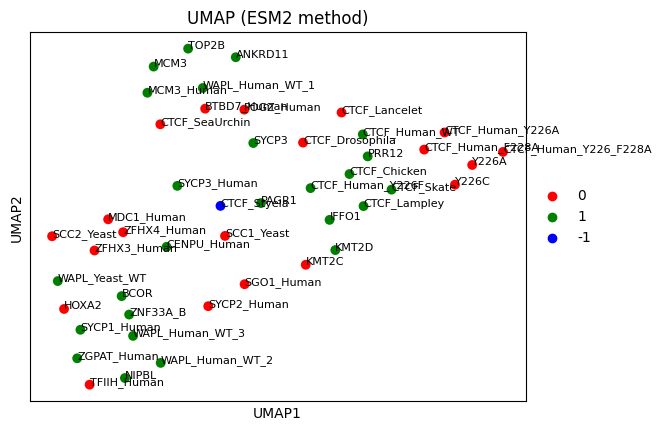

In [84]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

# Build AnnData object
X = np.vstack(all_df['emb'].values)
adata = sc.AnnData(X)
adata.obs['binding'] = all_df['binding'].values.astype(str)
adata.obs['name'] = all_df['name'].values

# ESM2 paper method:

sc.pp.neighbors(adata, n_neighbors=5, use_rep='X')
sc.tl.umap(adata, min_dist=0.5)

# Plot
ax = sc.pl.umap(adata, color='binding',
           palette={'1': 'green', '0': 'red', '-1': 'blue'},
           size=200, title='UMAP (ESM2 method)', show=False)

# Add text labels
X_umap = adata.obsm['X_umap']
for i, name in enumerate(adata.obs['name']):
    ax.text(X_umap[i, 0], X_umap[i, 1], name, fontsize=8)

plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


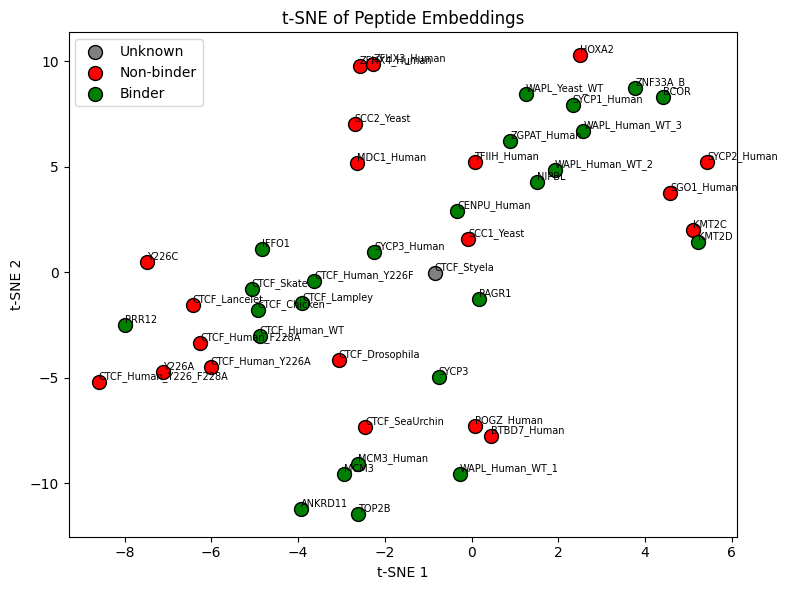

In [87]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

X = np.vstack(all_df['emb'].values)
y = all_df['binding'].values

# Scaled for 40 peptides
tsne = TSNE(
    n_components=2,
    perplexity=10,        # 5-10 for 40 samples (paper used 30 for 14K)
    n_iter=1000,          # 1000 enough for small data (paper used 3000)
    random_state=42
)
X_tsne = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))

colors = {1: 'green', 0: 'red', -1: 'gray'}
labels = {1: 'Binder', 0: 'Non-binder', -1: 'Unknown'}

for val in np.unique(y):
    mask = y == val
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                c=colors[val], label=labels[val], s=100, edgecolors='black')

for i, row in all_df.iterrows():
    plt.annotate(row['name'], (X_tsne[i, 0], X_tsne[i, 1]),
                 fontsize=7, ha='left', va='bottom')

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Peptide Embeddings')
plt.legend()
plt.tight_layout()
plt.show()